<a href="https://colab.research.google.com/github/JuanFelipePosada/python-basico_/blob/main/parcial_2_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

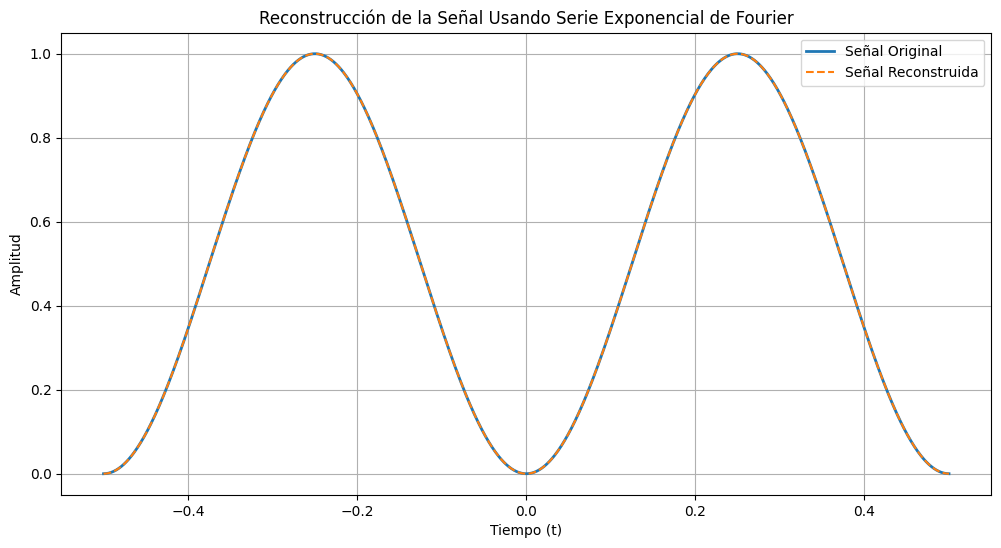

Error Relativo: 0.0000


In [167]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 1            # Ajusta A según sea necesario
F0 = 1          # Frecuencia fundamental
T = 1 / F0      # Periodo fundamental
N = 10          # Número de armónicos a considerar
Nm = 1000       # Número de muestras para la simulación

# Definir el rango de tiempo t ∈ [-1/(2*F0), 1/(2*F0)]
tv = np.linspace(-1/(2*F0), 1/(2*F0), Nm)

# Definir la señal original |A * sin(2πF0t)|^2
x_t = (A * np.sin(2 * np.pi * F0 * tv))**2

# Construir las bases de la serie exponencial de Fourier
wo = 2 * np.pi / T  # Frecuencia angular fundamental
phin = np.zeros((Nm, 2 * N + 1), dtype=np.complex_)  # Matriz para guardar las bases de Fourier

# Crear las bases para cada armónico
for n in range(-N, N + 1):
    phin[:, n + N] = np.exp(1j * n * wo * tv)  # Base de Fourier para el n-ésimo armónico

# Espectro de la señal (coeficientes Cn) - definir según la señal estudiada
Cn = np.zeros(2 * N + 1, dtype=np.complex_)  # Inicializamos los coeficientes espectrales
nv = np.linspace(-N, N, 2 * N + 1)           # Vector con los índices de los armónicos

# Definir los coeficientes de Fourier para la señal |A * sin(2πF0t)|^2
Cn[N] = A**2 / 2            # Nivel DC (C_0)
Cn[N - 2] = -A**2 / 4       # Coeficiente C_{-2}
Cn[N + 2] = -A**2 / 4       # Coeficiente C_{2}

# Reconstrucción de la señal usando la serie de Fourier
x_reconstructed = np.real(np.dot(phin, Cn))

# Graficar la señal original y la señal reconstruida
plt.figure(figsize=(12, 6))
plt.plot(tv, x_t, label='Señal Original', linewidth=2)
plt.plot(tv, x_reconstructed, label='Señal Reconstruida', linestyle='--')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.title('Reconstrucción de la Señal Usando Serie Exponencial de Fourier')
plt.grid(True)
plt.legend()
plt.show()

# Error relativo entre la señal original y la reconstruida
error_relativo = np.linalg.norm(x_t - x_reconstructed) / np.linalg.norm(x_t)
print(f'Error Relativo: {error_relativo:.4f}')


<ipython-input-131-7225d9653183>:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(nv, np.real(Cn), 'r', basefmt=" ", use_line_collection=True)
<ipython-input-131-7225d9653183>:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(nv, np.imag(Cn), 'r', basefmt=" ", use_line_collection=True)
<ipython-input-131-7225d9653183>:22: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword,

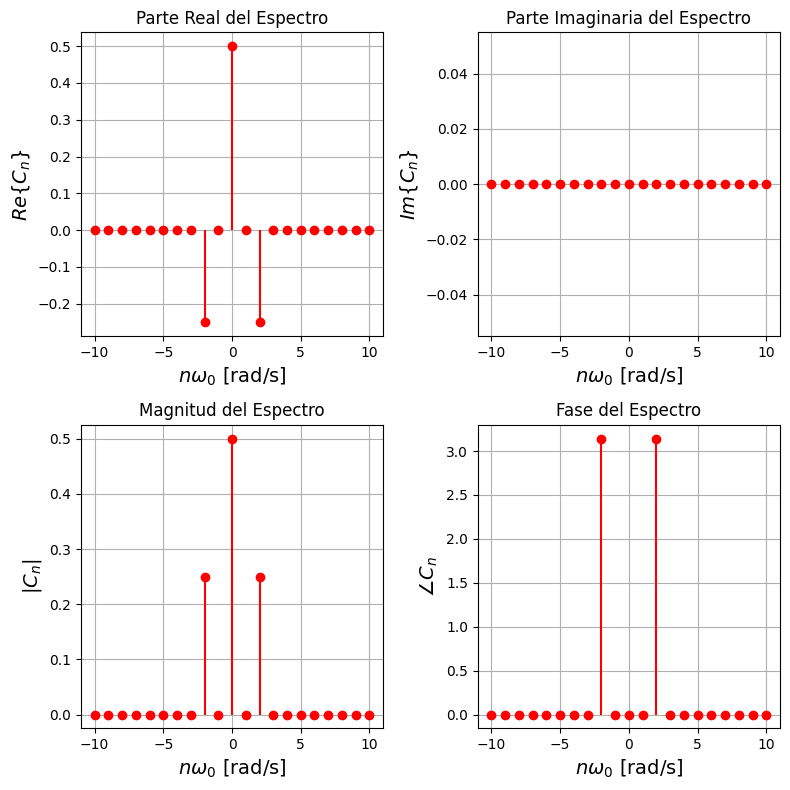

In [131]:

# Graficar el espectro de Fourier (Real, Imaginario, Magnitud y Fase)
fig = plt.figure(figsize=(8, 8))

# Parte Real del espectro
plt.subplot(2, 2, 1)
plt.stem(nv, np.real(Cn), 'r', basefmt=" ", use_line_collection=True)
plt.xlabel(r'$n\omega_0$ [rad/s]', fontsize=14)
plt.ylabel(r'$Re\{C_n\}$', fontsize=14)
plt.title('Parte Real del Espectro')
plt.grid()

# Parte Imaginaria del espectro
plt.subplot(2, 2, 2)
plt.stem(nv, np.imag(Cn), 'r', basefmt=" ", use_line_collection=True)
plt.xlabel(r'$n\omega_0$ [rad/s]', fontsize=14)
plt.ylabel(r'$Im\{C_n\}$', fontsize=14)
plt.title('Parte Imaginaria del Espectro')
plt.grid()

# Magnitud del espectro
plt.subplot(2, 2, 3)
plt.stem(nv, np.abs(Cn), 'r', basefmt=" ", use_line_collection=True)
plt.xlabel(r'$n\omega_0$ [rad/s]', fontsize=14)
plt.ylabel(r'$|C_n|$', fontsize=14)
plt.title('Magnitud del Espectro')
plt.grid()

# Fase del espectro
plt.subplot(2, 2, 4)
plt.stem(nv, np.angle(Cn), 'r', basefmt=" ", use_line_collection=True)
plt.xlabel(r'$n\omega_0$ [rad/s]', fontsize=14)
plt.ylabel(r'$\angle C_n$', fontsize=14)
plt.title('Fase del Espectro')
plt.grid()

fig.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


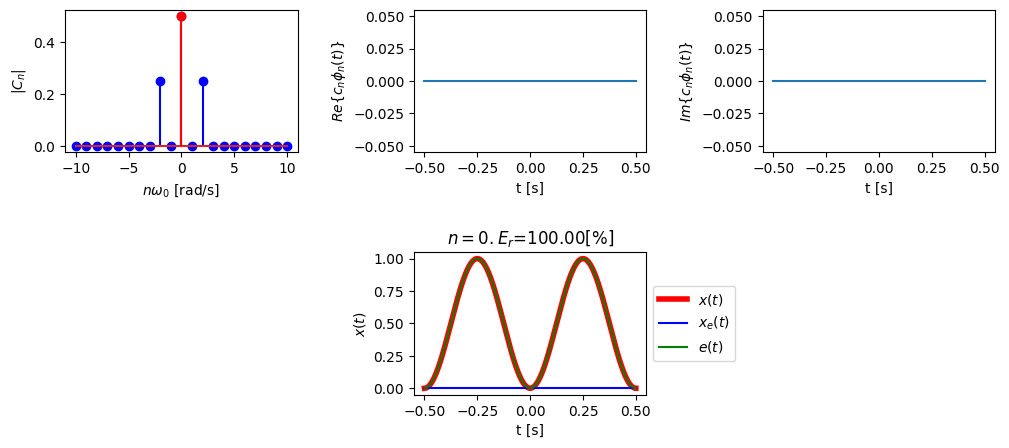

In [132]:
# Crear la figura y los ejes para la animación
fig, ax = plt.subplots(2, 3, figsize=(12, 5))

# Función para actualizar la animación
def update(n):
    # Limpiar ejes
    for row in ax:
        for subplot in row:
            subplot.clear()

    # Determinar los armónicos a considerar (del centro hacia los externos)
    ind = np.concatenate([np.arange(N - n, N + 1), np.arange(N + 1, N + n + 1)])
    ind = np.unique(ind)  # Eliminar duplicados si los hay
# Función para actualizar la animación
def update(n):
    # Limpiar ejes
    for row in ax:
        for subplot in row:
            subplot.clear()

    # Determinar los armónicos a considerar (del centro hacia los externos)
    ind = np.concatenate([np.arange(N - n, N + 1), np.arange(N + 1, N + n + 1)])
    ind = np.unique(ind)  # Eliminar duplicados si los hay
    # Actualización de espectro
    ax[0, 0].stem(nv, np.abs(Cn), 'b')  # Magnitud del espectro


    # Fix: Check for empty array and handle it
    if len(ind) > 0:
        ax[0, 0].stem(nv[ind], np.abs(Cn[ind]), 'r')  # Magnitud del espectro con el rango actualizado

    ax[0, 0].set_xlabel(r'$n\omega_0$ [rad/s]')
    ax[0, 0].set_ylabel(r'$|C_n|$')

    # Componentes espectrales
    if n > 0:
        ce = phin[:, ind].dot(np.diag(Cn[ind]))
    else:
        ce = np.zeros_like(tv)
    ax[0, 1].plot(tv, np.real(ce))  # Componente real
    ax[0, 1].set_xlabel('t [s]')
    ax[0, 1].set_ylabel(r'$Re\{c_n \phi_n(t)\}$')

    ax[0, 2].plot(tv, np.imag(ce))  # Componente imaginario
    ax[0, 2].set_xlabel('t [s]')
    ax[0, 2].set_ylabel(r'$Im\{c_n \phi_n(t)\}$')

    # Reconstrucción de la señal
    xe = np.zeros_like(tv)
    if n > 0:
        xe = phin[:, ind].dot(Cn[ind])
    et = x_t - xe

    # Calcular el error relativo
    error_relativo = np.linalg.norm(x_t - xe) / np.linalg.norm(x_t)

    ax[1, 1].plot(tv, x_t, 'r', linewidth=4, label='$x(t)$')
    ax[1, 1].plot(tv, xe, color='b', label='$x_e(t)$')  # Señal estimada
    ax[1, 1].plot(tv, et, color='g', label='$e(t)$')  # Error
    ax[1, 1].set_title(f'$n={n}. E_r$={100*error_relativo:.2f}[%]')
    ax[1, 1].set_xlabel('t [s]')
    ax[1, 1].set_ylabel('$x(t)$')
    ax[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Ejes vacíos
    ax[1, 0].axis('off')
    ax[1, 2].axis('off')

    plt.subplots_adjust(wspace=0.5, hspace=0.7)

# Crear la animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0, N + 1), blit=False)
rc('animation', html='jshtml')
anim

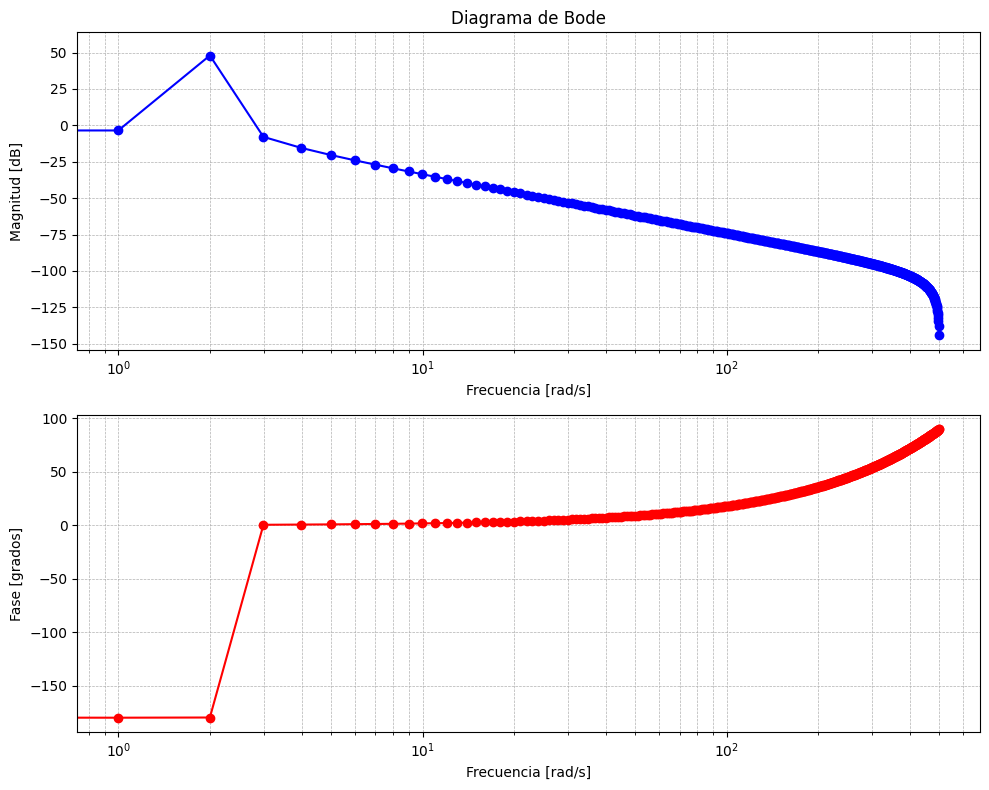

In [133]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 1           # Amplitud
F0 = 1          # Frecuencia fundamental
T = 1 / F0      # Periodo fundamental
Nm = 1000       # Número de muestras para la simulación

# Definir el rango de tiempo t ∈ [-1/(2*F0), 1/(2*F0)]
tv = np.linspace(-1/(2*F0), 1/(2*F0), Nm)

# Definir la señal original |A * sin(2πF0t)|^2
x_t = (A * np.sin(2 * np.pi * F0 * tv))**2

# Calcular la Transformada de Fourier de la señal
X_f = np.fft.fft(x_t)
frequencies = np.fft.fftfreq(Nm, tv[1] - tv[0])  # Frecuencias en radianes por segundo

# Obtener solo la parte positiva del espectro
half_n = Nm // 2
frequencies = frequencies[:half_n]
X_f = X_f[:half_n]

# Magnitud y fase
magnitudes = np.abs(X_f)
phases = np.angle(X_f, deg=True)  # Fase en grados

# Graficar el Diagrama de Bode
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Diagrama de Bode - Magnitud
ax1.semilogx(frequencies, 20 * np.log10(magnitudes), 'b-o')  # Magnitud en dB
ax1.set_title('Diagrama de Bode')
ax1.set_xlabel('Frecuencia [rad/s]')
ax1.set_ylabel('Magnitud [dB]')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Diagrama de Bode - Fase
ax2.semilogx(frequencies, phases, 'r-o')  # Fase en grados
ax2.set_xlabel('Frecuencia [rad/s]')
ax2.set_ylabel('Fase [grados]')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


# METODO POR TRANSFORMADA DE FOURIER

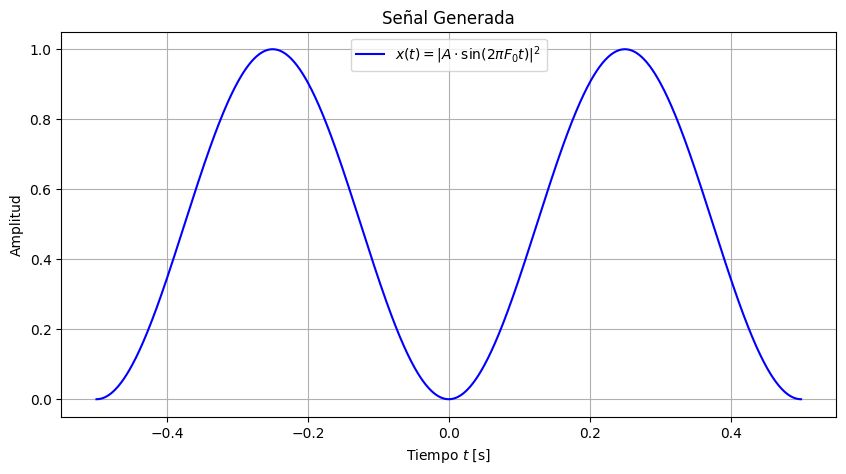

In [154]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 1            # Amplitud
F0 = 1           # Frecuencia fundamental
T = 1 / F0       # Periodo fundamental
Nm = 1000        # Número de muestras para la simulación

# Definir el rango de tiempo t ∈ [-1/(2*F0), 1/(2*F0)]
tv = np.linspace(-1/(2*F0), 1/(2*F0), Nm)

# Definir la señal original |A * sin(2πF0t)|^2
x_t = (A * np.sin(2 * np.pi * F0 * tv))**2

# Graficar la señal
plt.figure(figsize=(10, 5))
plt.plot(tv, x_t, label=r'$x(t) = |A \cdot \sin(2\pi F_0 t)|^2$', color='b')
plt.title('Señal Generada')
plt.xlabel('Tiempo $t$ [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()


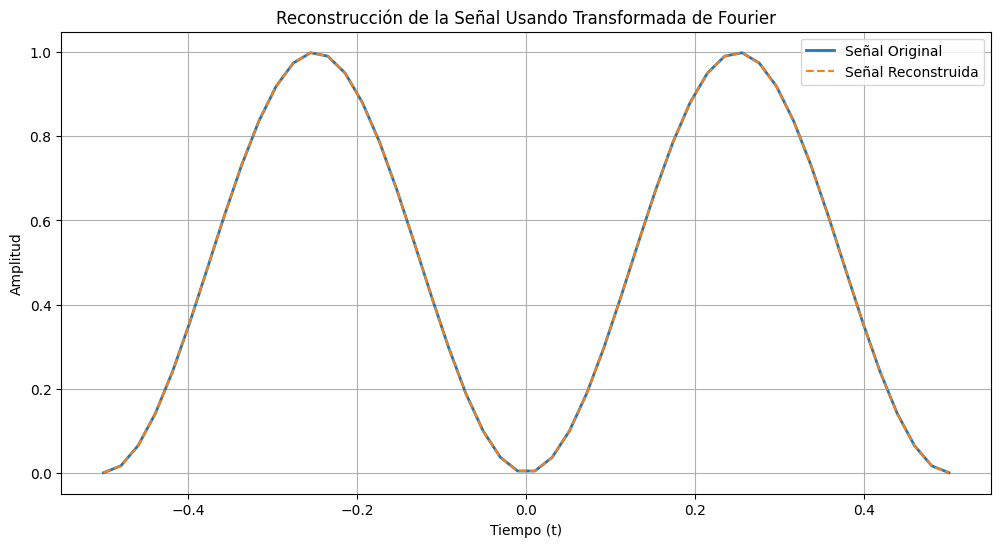

Error Relativo: 0.0000


In [151]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 1           # Amplitud
F0 = 1          # Frecuencia fundamental
T = 1 / F0      # Periodo fundamental
Nm = 50       # Número de muestras para la simulación

# Definir el rango de tiempo t ∈ [-1/(2*F0), 1/(2*F0)]
tv = np.linspace(-1/(2*F0), 1/(2*F0), Nm)

# Definir la señal original |A * sin(2πF0t)|^2
x_t = (A * np.sin(2 * np.pi * F0 * tv))**2

# Calcular la Transformada de Fourier de la señal
X_f = np.fft.fft(x_t)
frequencies = np.fft.fftfreq(Nm, tv[1] - tv[0])  # Frecuencias en radianes por segundo

# Reconstrucción de la señal usando la Transformada Inversa de Fourier
x_reconstructed = np.fft.ifft(X_f)

# Graficar la señal original y la señal reconstruida
plt.figure(figsize=(12, 6))
plt.plot(tv, x_t, label='Señal Original', linewidth=2)
plt.plot(tv, np.real(x_reconstructed), label='Señal Reconstruida', linestyle='--')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.title('Reconstrucción de la Señal Usando Transformada de Fourier')
plt.grid(True)
plt.legend()
plt.show()

# Error relativo entre la señal original y la reconstruida
error_relativo = np.linalg.norm(x_t - np.real(x_reconstructed)) / np.linalg.norm(x_t)
print(f'Error Relativo: {error_relativo:.4f}')



<ipython-input-152-3a6adbc3fa9e>:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies, np.real(X_f), 'r', basefmt=" ", use_line_collection=True)
<ipython-input-152-3a6adbc3fa9e>:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies, np.imag(X_f), 'r', basefmt=" ", use_line_collection=True)
<ipython-input-152-3a6adbc3fa9e>:22: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should b

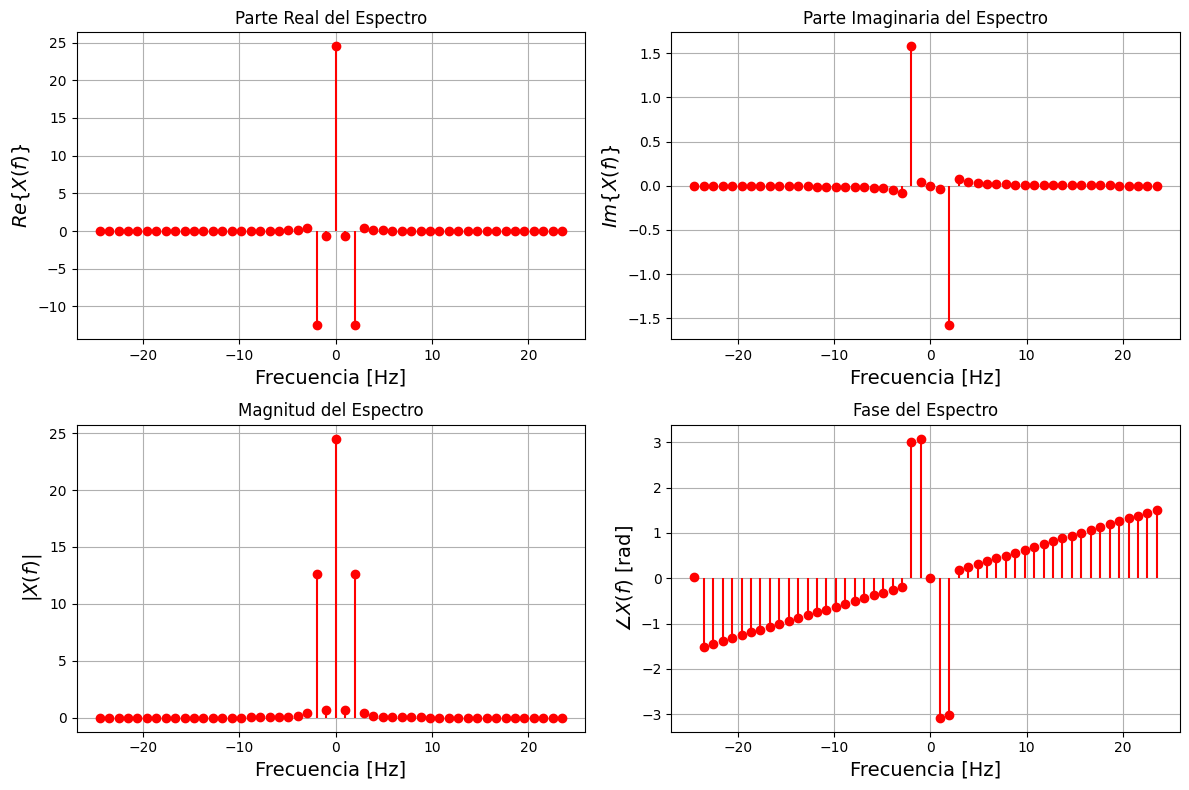

In [152]:

# Graficar el espectro de Fourier
fig = plt.figure(figsize=(12, 8))

# Parte Real del espectro
plt.subplot(2, 2, 1)
plt.stem(frequencies, np.real(X_f), 'r', basefmt=" ", use_line_collection=True)
plt.xlabel(r'Frecuencia [Hz]', fontsize=14)
plt.ylabel(r'$Re\{X(f)\}$', fontsize=14)
plt.title('Parte Real del Espectro')
plt.grid()

# Parte Imaginaria del espectro
plt.subplot(2, 2, 2)
plt.stem(frequencies, np.imag(X_f), 'r', basefmt=" ", use_line_collection=True)
plt.xlabel(r'Frecuencia [Hz]', fontsize=14)
plt.ylabel(r'$Im\{X(f)\}$', fontsize=14)
plt.title('Parte Imaginaria del Espectro')
plt.grid()

# Magnitud del espectro
plt.subplot(2, 2, 3)
plt.stem(frequencies, np.abs(X_f), 'r', basefmt=" ", use_line_collection=True)
plt.xlabel(r'Frecuencia [Hz]', fontsize=14)
plt.ylabel(r'$|X(f)|$', fontsize=14)
plt.title('Magnitud del Espectro')
plt.grid()

# Fase del espectro
plt.subplot(2, 2, 4)
plt.stem(frequencies, np.angle(X_f), 'r', basefmt=" ", use_line_collection=True)
plt.xlabel(r'Frecuencia [Hz]', fontsize=14)
plt.ylabel(r'$\angle X(f)$ [rad]', fontsize=14)
plt.title('Fase del Espectro')
plt.grid()

fig.tight_layout()
plt.show()


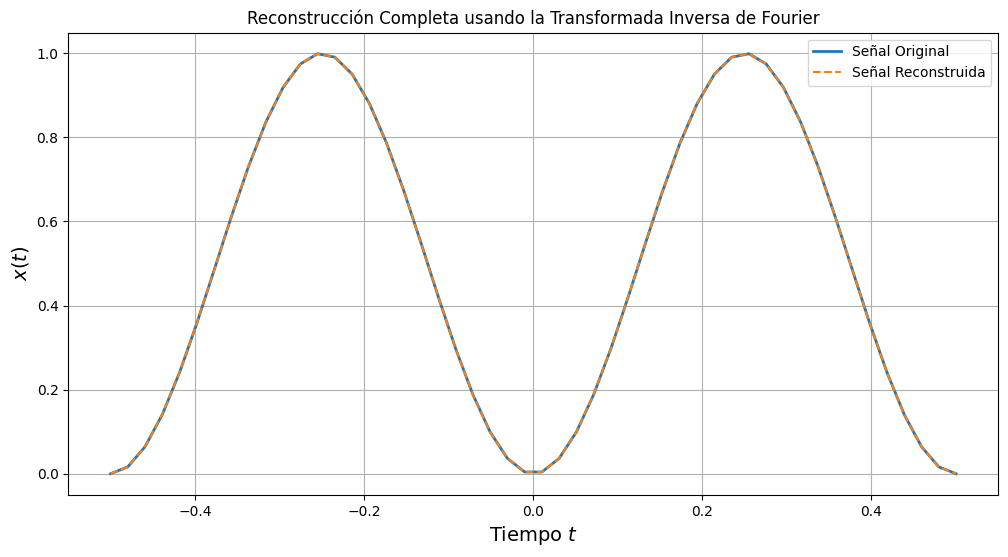

In [153]:
# Reconstrucción de la señal usando la Transformada Inversa de Fourier
x_reconstructed = np.fft.ifft(X_f)  # Inversa de Fourier para la señal compleja
x_reconstructed = np.real(x_reconstructed)  # Tomar solo la parte real para la señal reconstruida

# Graficar la señal original y la señal reconstruida
plt.figure(figsize=(12, 6))
plt.plot(tv, x_t, label='Señal Original', linewidth=2)
plt.plot(tv, x_reconstructed, label='Señal Reconstruida', linestyle='--')
plt.title(r'Reconstrucción Completa usando la Transformada Inversa de Fourier')
plt.xlabel(r'Tiempo $t$', fontsize=14)
plt.ylabel(r'$x(t)$', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

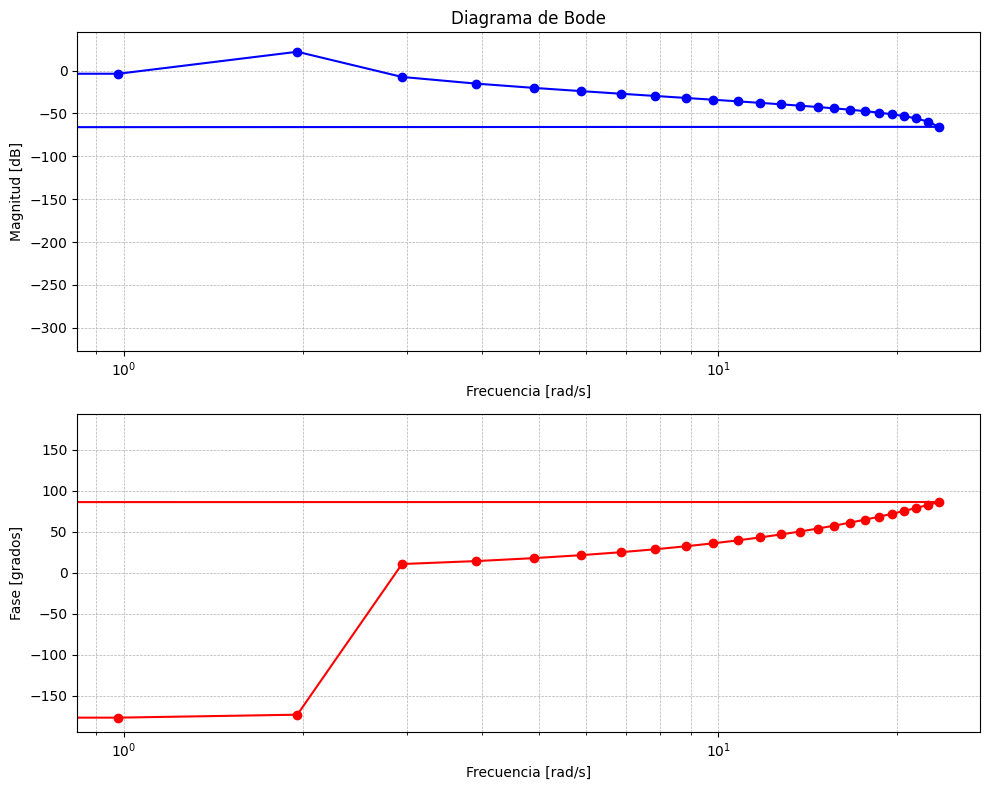

In [161]:
# Obtener solo la parte positiva del espectro
half_n = Nm // 2
frequencies = frequencies[:half_n]
X_f = X_f[:half_n]

# Magnitud y fase
magnitudes = np.abs(X_f)
phases = np.angle(X_f, deg=True)  # Fase en grados

# Graficar el Diagrama de Bode
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Diagrama de Bode - Magnitud
ax1.semilogx(frequencies, 20 * np.log10(magnitudes), 'b-o')  # Magnitud en dB
ax1.set_title('Diagrama de Bode')
ax1.set_xlabel('Frecuencia [rad/s]')
ax1.set_ylabel('Magnitud [dB]')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Diagrama de Bode - Fase
ax2.semilogx(frequencies, phases, 'r-o')  # Fase en grados
ax2.set_xlabel('Frecuencia [rad/s]')
ax2.set_ylabel('Fase [grados]')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()
